# Example Streaming Statistics Algorithms

In [56]:
%matplotlib inline
#%load_ext autoreload
#%autoreload 2
%reload_ext autoreload
import numpy as np
import matplotlib.pyplot as plt
import math, sys, os
from copy import deepcopy
from numpy.random import randn

# and pandas
import pandas as pd

## Sample Moments

In [65]:
class SampleMoments:
    
    def __init__(self):
        self.n = 0.0
        self.sum = 0.0
        self.mean = 0.0
        self._M2 = 0.0
        self.variance = 0.0
    
    def show(self):
        s = "  count: %f , sum: %f , mean: %f , variance: %f" % (self.n, self.sum, self.mean, self.variance)
        print("SampleMoments: ")
        print(s)
    
    def _update(self, data):
        for x in data:
            self.n += 1.0
            self.sum += float(x)
            delta = float(x - self.mean)
            self.mean += delta / float(self.n)
            self._M2 += delta**2
            if self.n < 2:
                self.variance = 0.0
            else:
                self.variance = self._M2 / float(self.n - 1)

    def update(self, arg):
        if (type(arg) == list) or (type(arg) == np.ndarray):
            data = arg
        elif (type(arg) == int) or (type(arg) == float):
            data = [arg]
        else:
            raise TypeError("Incompatable type: %s" % str(type(arg)))
        self._update(data)

SampleMoments: 
  count: 0.000000 , sum: 0.000000 , mean: 0.000000 , variance: 0.000000
SampleMoments: 
  count: 5.000000 , sum: 10.000000 , mean: 2.000000 , variance: 3.375000
SampleMoments: 
  count: 10.000000 , sum: 45.000000 , mean: 4.500000 , variance: 10.666667
SampleMoments: 
  count: 110.000000 , sum: 1045.000000 , mean: 9.500000 , variance: 3.545897


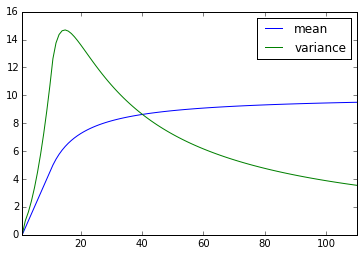

In [66]:
a0 = [0,1,2,3,4]
a1 = [5,6,7,8,9]
a2 = [10]*100

SM = SampleMoments()
SM.show()
SM.update(a0)
SM.show()
SM.update(a1)
SM.show()
SM.update(a2)
SM.show()

MU = []
SIGMA = []
SM = SampleMoments()
data = a0 + a1 + a2
N = range(1,len(data) + 1)
for i in data:
    SM.update(i)
    MU += [SM.mean]
    SIGMA += [SM.variance]

# plot it
MU = pd.Series(MU, index = N)
SIGMA = pd.Series(SIGMA, index = N)
pd.concat([MU,SIGMA],axis=1,keys=['mean', 'variance']).plot()

## Iterpolation based Approximate Histogram

In [67]:
# TODO
# class tDigest: